<a href="https://colab.research.google.com/github/AbhigyanSingh97/Simple-Chatbot/blob/master/Chatbot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
nltk.download('punkt')
from nltk.stem.lancaster import LancasterStemmer
stemmer = LancasterStemmer()

import tensorflow as tf
import numpy as np
import random
import json

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
tf.__version__

'2.2.0'

In [ ]:
from google.colab import files
files.upload()

{}

In [ ]:
with open('intents.json') as json_data:
  intents = json.load(json_data)

In [ ]:
intents

{'intents': [{'context_set': '',
   'patterns': ['Hi', 'How are you', 'Is anyone there?', 'Hello', 'Good day'],
   'responses': ['Hello, thanks for visiting',
    'Good to see you again',
    'Hi there, how can I help?'],
   'tag': 'greeting'},
  {'patterns': ['Bye', 'See you later', 'Goodbye'],
   'responses': ['See you later, thanks for visiting',
    'Have a nice day',
    'Bye! Come back again soon.'],
   'tag': 'goodbye'},
  {'patterns': ['Thanks', 'Thank you', "That's helpful"],
   'responses': ['Happy to help!', 'Any time!', 'My pleasure'],
   'tag': 'thanks'},
  {'patterns': ['What hours are you open?',
    'What are your hours?',
    'When are you open?'],
   'responses': ["We're open every day 9am-9pm",
    'Our hours are 9am-9pm every day'],
   'tag': 'hours'},
  {'patterns': ['What is your location?',
    'Where are you located?',
    'What is your address?',
    'Where is your restaurant situated?'],
   'responses': ['We are on the intersection of London Alley and Bridge A

In [ ]:
words = []
classes = []
documents = []
ignore_words = ['?']
# loop through each sentence in our intents patterns
for intent in intents['intents']:
    for pattern in intent['patterns']:
        # tokenize each word in the sentence
        w = nltk.word_tokenize(pattern)
        # add to our words list
        words.extend(w)
        # add to documents in our corpus
        documents.append((w, intent['tag']))
        # add to our classes list
        if intent['tag'] not in classes:
            classes.append(intent['tag'])

In [ ]:
words

['Hi',
 'How',
 'are',
 'you',
 'Is',
 'anyone',
 'there',
 '?',
 'Hello',
 'Good',
 'day',
 'Bye',
 'See',
 'you',
 'later',
 'Goodbye',
 'Thanks',
 'Thank',
 'you',
 'That',
 "'s",
 'helpful',
 'What',
 'hours',
 'are',
 'you',
 'open',
 '?',
 'What',
 'are',
 'your',
 'hours',
 '?',
 'When',
 'are',
 'you',
 'open',
 '?',
 'What',
 'is',
 'your',
 'location',
 '?',
 'Where',
 'are',
 'you',
 'located',
 '?',
 'What',
 'is',
 'your',
 'address',
 '?',
 'Where',
 'is',
 'your',
 'restaurant',
 'situated',
 '?',
 'Do',
 'you',
 'take',
 'credit',
 'cards',
 '?',
 'Do',
 'you',
 'accept',
 'Mastercard',
 '?',
 'Are',
 'you',
 'cash',
 'only',
 '?',
 'What',
 'is',
 'your',
 'menu',
 'for',
 'today',
 '?',
 'What',
 'are',
 'you',
 'serving',
 'today',
 '?',
 'What',
 'is',
 'today',
 "'s",
 'special',
 '?',
 'Do',
 'you',
 'provide',
 'home',
 'delivery',
 '?',
 'Do',
 'you',
 'deliver',
 'the',
 'food',
 '?',
 'What',
 'are',
 'the',
 'home',
 'delivery',
 'options',
 '?',
 'What',
 'i

In [ ]:
documents

[(['Hi'], 'greeting'),
 (['How', 'are', 'you'], 'greeting'),
 (['Is', 'anyone', 'there', '?'], 'greeting'),
 (['Hello'], 'greeting'),
 (['Good', 'day'], 'greeting'),
 (['Bye'], 'goodbye'),
 (['See', 'you', 'later'], 'goodbye'),
 (['Goodbye'], 'goodbye'),
 (['Thanks'], 'thanks'),
 (['Thank', 'you'], 'thanks'),
 (['That', "'s", 'helpful'], 'thanks'),
 (['What', 'hours', 'are', 'you', 'open', '?'], 'hours'),
 (['What', 'are', 'your', 'hours', '?'], 'hours'),
 (['When', 'are', 'you', 'open', '?'], 'hours'),
 (['What', 'is', 'your', 'location', '?'], 'location'),
 (['Where', 'are', 'you', 'located', '?'], 'location'),
 (['What', 'is', 'your', 'address', '?'], 'location'),
 (['Where', 'is', 'your', 'restaurant', 'situated', '?'], 'location'),
 (['Do', 'you', 'take', 'credit', 'cards', '?'], 'payments'),
 (['Do', 'you', 'accept', 'Mastercard', '?'], 'payments'),
 (['Are', 'you', 'cash', 'only', '?'], 'payments'),
 (['What', 'is', 'your', 'menu', 'for', 'today', '?'], 'todaysmenu'),
 (['What',

In [ ]:
classes

['greeting',
 'goodbye',
 'thanks',
 'hours',
 'location',
 'payments',
 'todaysmenu',
 'deliveryoption',
 'menu']

In [ ]:
words = [stemmer.stem(w.lower()) for w in words if w not in ignore_words]
words = sorted(list(set(words)))
# sort classes
classes = sorted(list(set(classes)))
# documents = combination between patterns and intents
print (len(documents), "documents")
# classes = intents
print (len(classes), "classes", classes)
# words = all words, vocabulary
print (len(words), "unique stemmed words", words)

31 documents
9 classes ['deliveryoption', 'goodbye', 'greeting', 'hours', 'location', 'menu', 'payments', 'thanks', 'todaysmenu']
57 unique stemmed words ["'s", 'acceiv', 'address', 'anyon', 'ar', 'bye', 'can', 'card', 'cash', 'cours', 'credit', 'day', 'del', 'delicy', 'delivery', 'dish', 'do', 'food', 'for', 'from', 'good', 'goodby', 'hello', 'help', 'hi', 'hom', 'hour', 'how', 'is', 'lat', 'loc', 'main', 'mastercard', 'me', 'menu', 'most', 'on', 'op', 'opt', 'provid', 'resta', 'see', 'serv', 'situ', 'spec', 'tak', 'tel', 'thank', 'that', 'the', 'ther', 'today', 'what', 'when', 'wher', 'yo', 'you']


# Creating our training data

In [ ]:
training = []#empty list to append our processed data for training
# create an empty array for our output
output_empty = [0] * len(classes)
# training set, bag of words for each sentence
for doc in documents:
    # initialize our bag of words
    bag = []
    # list of tokenized words for the pattern
    pattern_words = doc[0]
    # stem each word - create base word, in attempt to represent related words
    pattern_words = [stemmer.stem(word.lower()) for word in pattern_words]
    # create our bag of words array with 1, if word match found in current pattern
    for w in words:
        bag.append(1) if w in pattern_words else bag.append(0)
    
    # output is a '0' for each tag and '1' for current tag (for each pattern)
    output_row = list(output_empty)
    output_row[classes.index(doc[1])] = 1
    
    training.append([bag, output_row])
# shuffle our features and turn into np.array
random.shuffle(training)
training = np.array(training)
# create train and test lists. X - patterns, Y - intents
train_x = list(training[:,0])
train_y = list(training[:,1])

In [ ]:
import keras

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(128, input_shape=(len(train_x[0]),), activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(len(train_y[0]), activation='sigmoid'))

model.compile(optimizer = keras.optimizers.Adam(),loss = 'binary_crossentropy',metrics = ['accuracy'])
fit_model = model.fit(np.array(train_x), np.array(train_y), epochs=1000, batch_size=8, verbose=1)

Epoch 1/1000
31/31 [==============================] - 0s 5ms/step - loss: 0.7084 - accuracy: 0.4731
Epoch 2/1000
31/31 [==============================] - 0s 610us/step - loss: 0.6660 - accuracy: 0.5986
Epoch 3/1000
31/31 [==============================] - 0s 564us/step - loss: 0.6552 - accuracy: 0.6308
Epoch 4/1000
31/31 [==============================] - 0s 599us/step - loss: 0.6387 - accuracy: 0.6703
Epoch 5/1000
31/31 [==============================] - 0s 575us/step - loss: 0.6176 - accuracy: 0.7348
Epoch 6/1000
31/31 [==============================] - 0s 638us/step - loss: 0.5701 - accuracy: 0.7921
Epoch 7/1000
31/31 [==============================] - 0s 565us/step - loss: 0.5556 - accuracy: 0.7849
Epoch 8/1000
31/31 [==============================] - 0s 686us/step - loss: 0.5272 - accuracy: 0.8351
Epoch 9/1000
31/31 [==============================] - 0s 566us/step - loss: 0.5235 - accuracy: 0.8136
Epoch 10/1000
31/31 [==============================] - 0s 565us/step - loss: 0.5148 

In [ ]:
import matplotlib.pyplot as plt


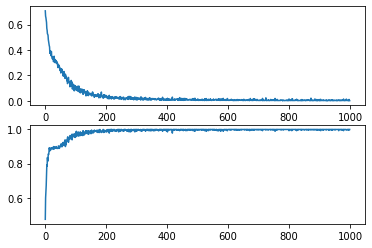

In [ ]:
fig,ax = plt.subplots(2,1)
ax[0].plot(fit_model.history['loss'],label = 'Loss')
ax[1].plot(fit_model.history['accuracy'],label = 'accuracy')

In [ ]:
model.save("Chatbot.keras")

In [ ]:
import pickle

In [ ]:
"""pickle.dump({'words':words,'classes':classes,'train_x':train_x,'train_y':train_y},open("training_data","wb"))
data = pickle.load(open("training_data","rb))
words = data['words']
classes = data['classes']
train_x = data['train_x']
train_y = data['train_y']"""

'pickle.dump({\'words\':words,\'classes\':classes,\'train_x\':train_x,\'train_y\':train_y},open("training_data","wb"))\ndata = pickle.load(open("training_data","rb))\nwords = data[\'words\']\nclasses = data[\'classes\']\ntrain_x = data[\'train_x\']\ntrain_y = data[\'train_y\']'

In [ ]:
#Ways to produce BOW from user

In [ ]:
def clean_up_sentence(sentence):
    # tokenize the pattern - split words into array
    sentence_words = nltk.word_tokenize(sentence)
    # stem each word - create short form for word
    sentence_words = [stemmer.stem(word.lower()) for word in sentence_words]
    return sentence_words

In [ ]:
def bow(sentence, words, show_details=False):
    # tokenize the pattern
    sentence_words = clean_up_sentence(sentence)
    # bag of words - matrix of N words, vocabulary matrix
    bag = [0]*len(words)  
    for s in sentence_words:
        for i,w in enumerate(words):
            if w == s: 
                # assign 1 if current word is in the vocabulary position
                bag[i] = 1
                if show_details==True:
                    print ("found in bag: %s" % w)
    return(np.array(bag))

In [ ]:
p = bow("Where is India location", words)
print (p)
print (classes)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0]
['deliveryoption', 'goodbye', 'greeting', 'hours', 'location', 'menu', 'payments', 'thanks', 'todaysmenu']


In [ ]:
#Building response processor

In [ ]:
import pandas as pd

In [ ]:
def classify(sentence,show_details):
    #ERROR_THRESHOLD = 0.25
    
    # generate probabilities from the model
    input_data = pd.DataFrame([bow(sentence, words,show_details)], dtype=float, index=['input'])
    results = model.predict([input_data])[0]
    # filter out predictions below a threshold, and provide intent index
    results = [[i,r] for i,r in enumerate(results) if r>0.4]
    # sort by strength of probability
    results.sort(key=lambda x: x[1], reverse=True)
    return_list = []
    for r in results:
        return_list.append((classes[r[0]], str(r[1])))
    # return tuple of intent and probability
    
    return return_list

In [ ]:
classify('What are your hours of opertaion?',True)

found in bag: what
found in bag: ar
found in bag: yo
found in bag: hour


[('hours', '0.9994363')]

In [ ]:
def response(sentence, userID='123', show_details=False):
    results = classify(sentence,show_details)
    # if we have a classification then find the matching intent tag
    if results:
        # loop as long as there are matches to process
        while results:
            for i in intents['intents']:
                # find a tag matching the first result
                if i['tag'] == results[0][0]:
                    # set context for this intent if necessary
                    if 'context_set' in i:
                        if show_details==True: print ('context:', i['context_set'])
                        context[userID] = i['context_set']

                    # check if this intent is contextual and applies to this user's conversation
                    if not 'context_filter' in i or \
                        (userID in context and 'context_filter' in i and i['context_filter'] == context[userID]):
                        if show_details==True: print ('tag:', i['tag'])
                        # a random response from the intent
                        return print(random.choice(i['responses']))

            results.pop(0)

In [ ]:
response('What hours are you open?',show_details=True)

found in bag: what
found in bag: hour
found in bag: ar
found in bag: you
found in bag: op
tag: hours
We're open every day 9am-9pm


In [ ]:
response('Do accept credit card')

We accept most major credit cards


In [ ]:
response('That is helpful')

Any time!


In [ ]:
response('Bye')

Have a nice day


In [ ]:
response('Are you open?',show_details=True)

found in bag: ar
found in bag: you
found in bag: op
tag: hours
We're open every day 9am-9pm


In [ ]:
response('Do you accept cards?')

We accept VISA, Mastercard and AMEX
